In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")

Setup complete...


In [2]:
rw = pd.read_csv('../input/winequality-red.csv')
print("Dataset loaded...")

Dataset loaded...


In [3]:
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
rw.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
rw.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

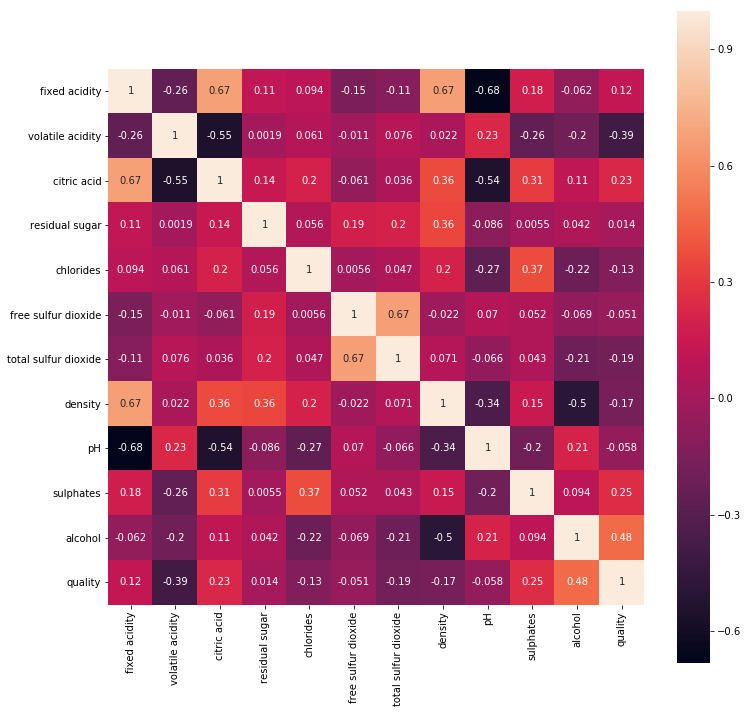

In [6]:
corr = rw.corr()
plt.figure(figsize = (12,12))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

# Quality of red wine has
#### positive corr with -
* Alcohol content
* Suplahtes
* Citric acid

#### negative correlation with
* Volatile acidity
* Total sulphur dioxide

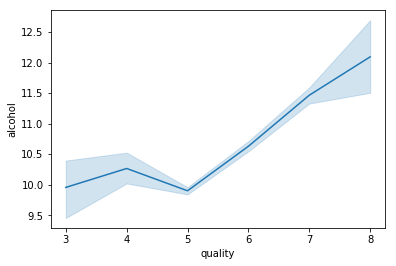

In [7]:
sns.lineplot(x = 'quality', y = 'alcohol', data = rw)

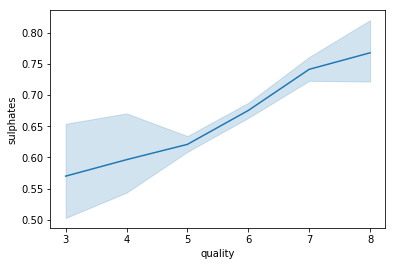

In [8]:
sns.lineplot(x = 'quality', y = 'sulphates', data = rw)

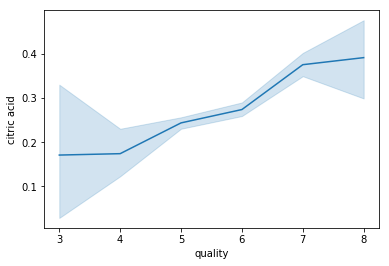

In [9]:
sns.lineplot(x = 'quality', y = 'citric acid', data = rw)

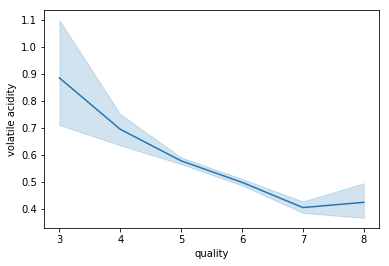

In [10]:
sns.lineplot(x = 'quality', y = 'volatile acidity', data = rw)

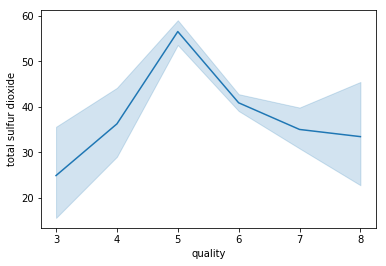

In [11]:
sns.lineplot(x = 'quality', y = 'total sulfur dioxide', data = rw)

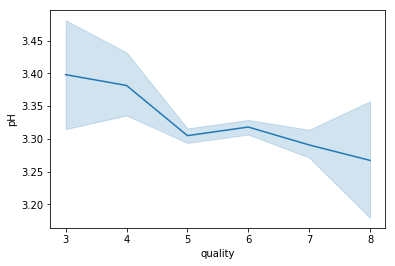

In [12]:
sns.lineplot(x = 'quality', y = 'pH', data = rw)

In [13]:
# classifying wines as good or bad
# < 6.5 bad
bins = (2, 6.5, 8)
name = ['bad', 'good']
rw['quality'] = pd.cut(rw['quality'], bins = bins, labels = name)
rw.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [14]:
rw['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

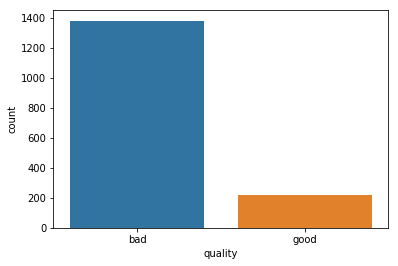

In [15]:
sns.countplot(rw['quality'])

In [16]:
le = LabelEncoder()
rw['quality'] = le.fit_transform(rw['quality'])

In [17]:
# Generating data for test and train cases
X = rw.drop(['quality'], axis = 1)
Y = rw['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# DecisionTreeClassifier

In [19]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
print(accuracy_score(y_test, pred))

0.83125


# KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(accuracy_score(pred, y_test))

0.875


# RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)
print(accuracy_score(y_test, pred))

0.890625


# XGBoost

In [22]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print(accuracy_score(y_test, pred))

0.878125


# SVC

In [23]:
svc = SVC()
cv = ShuffleSplit(n_splits = 2, test_size = 0.20, random_state = 7)
scores = cross_val_score(svc, x_train, y_train, cv = cv)
print(scores.mean())

0.908203125


# GradientBoostingRegressor

In [24]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test).astype(int)
print(accuracy_score(y_test, pred))

0.86875


# AdaBoostRegressor

In [25]:
abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
pred = abr.predict(x_test).astype(int)
print(accuracy_score(y_test, pred))

0.871875


# Tuning hyperparametres for SVC

In [26]:
# finding best paramentres for SVC model through GridSearchCV
#Finding best parameters for our SVC model

svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10)

clf.fit(x_train, y_train)
clf.best_params_

{'C': 1.2, 'gamma': 1.4, 'kernel': 'rbf'}

In [30]:
# Re-running model with best parametres
svc1 = SVC(C = 1.2, gamma = 1.4, kernel = 'rbf')
svc1.fit(x_train, y_train)
pred = svc1.predict(x_test)
print(accuracy_score(y_test, pred))

0.9125


# Tuning hyperparametres for RandomForestClassifier

In [31]:
rfc = RandomForestClassifier()

params = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_clf = GridSearchCV(rfc, param_grid = params, scoring = 'accuracy', cv = 10)
rfc_clf.fit(x_train, y_train)
rfc_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [32]:
rfc1 = RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'log2', n_estimators = 200)
rfc1.fit(x_train, y_train)
pred = rfc1.predict(x_test)
print(accuracy_score(y_test, pred))

0.890625


# Tuning hyperparametres for XGBoost

In [40]:
# Takes really long to run
'''
xgb = XGBClassifier()
params = {
        'learning_rate' : [0.05, 0.1, 0.5, 1, 2, 3],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb_clf = GridSearchCV(xgb, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)
xgb_clf.fit(x_train, y_train)
print(xgb_clf.best_params_)
'''

"\nxgb = XGBClassifier()\nparams = {\n        'learning_rate' : [0.05, 0.1, 0.5, 1, 2, 3],\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\n\nxgb_clf = GridSearchCV(xgb, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)\nxgb_clf.fit(x_train, y_train)\nprint(xgb_clf.best_params_)\n"

In [ ]:
# Best params - {'colsample_bytree': 0.6, 'gamma': 1.5, 'learning_rate': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
xgb1 = XGBClassifier(learning_rate = 0.5, max_depth = 5, min_child_weight = 1, subsample = 0.8, gamma = 1.5, colsample_bytree = 0.6)
xgb1.fit(x_train, y_train)
pred = xgb1.predict(x_test)
print(accuracy_score(y_test, pred))